## Solving the repressilator model

#### Import the usual, plus scipy package for solving initial value problems

In [1]:
import matplotlib.pylab as plt   
%matplotlib inline  
import numpy as np 

# import scipy.optimize as opt
# import scipy.linalg as la
import scipy.integrate as scint

### Defining the ODE.  

For $i = 1,2,3$:
\begin{align*}
\dot{m_i} &= -m_i + \frac{\alpha}{1+p_j^n} + \alpha_0 \\
\dot{p_i} &= -\beta (p_i - m_i)  \\[1ex]
\end{align*}

In [2]:
def repressilator_odefun(t,x,alpha,alpha0,beta,n):
    '''
    Flow (dx/dt) of the repressilator system to pass into the numerical solver.
    
    Takes as input: 
        - current time point t (no explicit time dependence in code, but necessary for scipy solver),
        - current state vector x (6-vector: first three entries are m_i, second three are p_i)
        - parameters alpha, alpha0, beta, n (to be passed into solver as 'args')
    
    Returns: vector of derivatives as given by the repressilator ODEs
    '''
    
    # input vector x contains all state variables, extract accordingly
    m1=x[0] 
    m2=x[1]
    m3=x[2] 
    p1=x[3]
    p2=x[4]
    p3=x[5]
    
    # derivative of each variable
    dm1dt=-m1 + alpha/(1.+p3**n)+ alpha0;
    dm2dt=-m2 + alpha/(1.+p1**n)+ alpha0;
    dm3dt=-m3 + alpha/(1.+p2**n)+ alpha0;

    dp1dt=-beta*(p1-m1) 
    dp2dt=-beta*(p2-m2) 
    dp3dt=-beta*(p3-m3) 

    return np.array([dm1dt,dm2dt,dm3dt,dp1dt,dp2dt,dp3dt])

In [3]:
# Define params and test the function out!

alpha=0 # max repression rate of each gene by corresponding repressor
alpha0=50 # base transcription rate of each gene
beta=0.2 # protein degradation rate
n=2 # Hill coefficient

x0=np.array([0.2, 0.1, 0.3, 0.1, 0.4, 0.5]) # initial conditions: all genes 'ON', proteins present
t=0 # initial time
print(repressilator_odefun(t,x0,alpha,alpha0,beta,n)) # call dx/dt function: derivative at time 0

[ 4.98e+01  4.99e+01  4.97e+01  2.00e-02 -6.00e-02 -4.00e-02]


### Solving the ODE via scipy integrate module, which we imported above

We pass a time range, initial condition, and evaluation time list into SciPy's solve_ivp as follows.  That's just as in the tutorial (see Canvas!).  Here, we additionally pass parameters as args (in order).

In [9]:
# specify trange, a time range for simulation: two element array
tstart=0
tend=100
trange=np.array([tstart,tend])

# specify tlist,  a list of time points at which want to return the solution
numt=500
tlist=np.linspace(tstart,tend,numt)

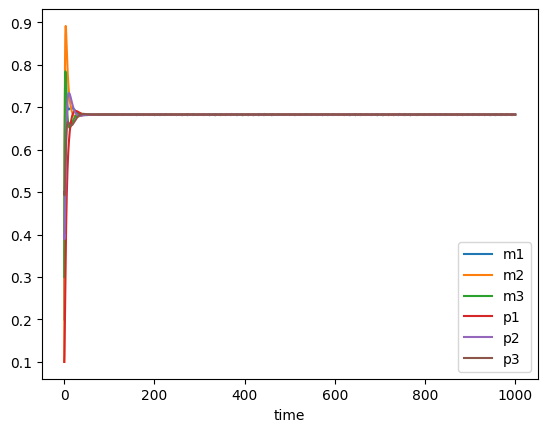

In [10]:
# Define paramaters
alpha=1 # max repression rate of each gene by corresponding repressor
alpha0=0 # base transcription rate of each gene
beta=0.2 # protein degradation rate
n=2 # Hill coefficient

#Define initial condition, at random 
# rng = np.random.default_rng(2) # set seed, so we get same ICs each time
# x0=rng.uniform(0,4,6) # 6 random numbers between 0 and 4 
x0 = np.array([0.2, 0.1, 0.3, 0.1, 0.4, 0.5])

# Solve!
sol=scint.solve_ivp(repressilator_odefun, trange, x0, t_eval=tlist, args=(alpha,alpha0,beta,n))

# Plot!
# sol object has "attributes" t (time points) and y (actual solution: state variables)
plt.plot(sol.t,sol.y[0,:],label='m1')
plt.plot(sol.t,sol.y[1,:],label='m2')
plt.plot(sol.t,sol.y[2,:],label='m3')
plt.plot(sol.t,sol.y[3,:],label='p1')
plt.plot(sol.t,sol.y[4,:],label='p2')
plt.plot(sol.t,sol.y[5,:],label='p3')
plt.xlabel('time')
plt.legend()

#use to zoom in if needed
# plt.xlim(80,100)
# plt.ylim(min(sol.y[:,-1])-0.1,max(sol.y[:,-1])+0.1)

#### Visualize in (a 2-D projection of) state space

That is, plot the parameteric curve $\big(m_1(t), m_2(t)\big)$.

Text(0, 0.5, 'm2')

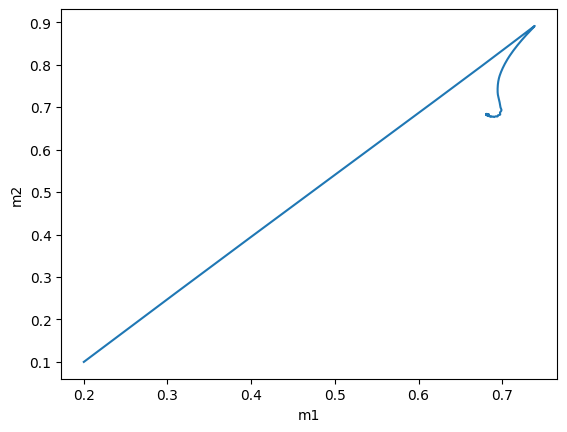

In [11]:
plt.plot(sol.y[0,:],sol.y[1,:])
plt.xlabel('m1')
plt.ylabel('m2')

#### Breakout Groups: ~5-10 Minutes

Play around with different values of $\alpha$ (e.g., some very small, some very large). Do you see a qualitative change in the solutions? About how large does $\alpha$ have to be to see oscillations?